# 17LIVE Data Analyst Assignment
## Objective:
- Identify optimal ad placement times
- Evaluate the ad campaign performance

In [1]:
# Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import ttest_ind, mannwhitneyu

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv("all_stream_info.csv")
df.head()

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,...,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,dau
0,109437538,2020-06-22 11:55:21 UTC,2020-06-22 16:37:19 UTC,16918,normalEnd,363,2020-06-22 16:28:17.87 UTC,0,11092,0,...,68,17,13,32248.0,424.32,228.71,1108,5,13105,NaN
1,109441785,2020-06-22 14:55:26 UTC,2020-06-22 21:31:19 UTC,23753,normalEnd,100,2020-06-22 19:07:52.872 UTC,0,772,0,...,68,20,8,17138.0,186.28,134.94,2318,-3,90701,NaN
2,109438205,2020-06-22 12:20:34 UTC,2020-06-22 16:02:46 UTC,13332,disconnect,471,2020-06-22 14:53:26.692 UTC,0,19403,0,...,696,60,17,60852.0,81.14,34.46,1199,7,222376,NaN
3,109438917,2020-06-22 12:54:21 UTC,2020-06-22 14:47:27 UTC,6786,normalEnd,44,2020-06-22 14:29:13.806 UTC,0,191,0,...,41,12,8,18326.0,389.91,213.09,432,0,4313,NaN
4,109442185,2020-06-22 15:18:20 UTC,2020-06-22 15:48:02 UTC,1782,normalEnd,52,2020-06-22 15:42:33.849 UTC,0,77,0,...,38,17,5,8465.0,222.76,138.77,162,0,1547,NaN


In [2]:
# Step 2: Initial Data Exploration
df.info()
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148 entries, 0 to 3147
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   liveStreamID             3148 non-null   int64  
 1   beginTime                3148 non-null   object 
 2   endTime                  3148 non-null   object 
 3   duration                 3148 non-null   int64  
 4   closeBy                  3051 non-null   object 
 5   maxLiveViewerCount       3148 non-null   int64  
 6   maxLiveViewerTime        1838 non-null   object 
 7   privateLiveStream        3148 non-null   int64  
 8   receivedLikeCount        3148 non-null   int64  
 9   streamerType             3148 non-null   int64  
 10  isShow                   3148 non-null   bool   
 11  cultureGroup             0 non-null      float64
 12  userID                   3148 non-null   object 
 13  registerTime             3148 non-null   object 
 14  registerCountry         

,liveStreamID,duration,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,cultureGroup,isContracted,uniqueViewerCount,ios,...,durationGTE5sec,durationGTE2min,durationGTE10min,totalViewerDuration,avgViewerDuration,avgStreamJoinDuration,count,followIncreaseEstimated,receivePointEstimated,dau
count,3.148000e+03,3148.000000,3148.000000,3148.0,3148.000000,3148.0,0.0,0.0,3148.000000,3148.000000,...,3148.000000,3148.000000,3148.000000,1689.000000,1689.000000,1689.000000,3148.000000,3148.000000,3.148000e+03,0.0
mean,1.093797e+08,3495.864041,15.416773,0.0,358.428526,0.0,NaN,NaN,55.416773,26.285896,...,44.560991,8.994917,3.937103,22296.820604,241.049467,128.459816,126.772872,1.171855,8.874376e+03,NaN
std,3.381310e+04,6651.916426,45.505183,0.0,2145.579197,0.0,NaN,NaN,160.855894,81.280647,...,131.896474,26.843270,13.057200,58915.178623,244.360800,129.403209,330.297666,11.754047,4.778547e+04,NaN
min,1.093211e+08,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-286.000000,0.000000e+00,NaN
25%,1.093518e+08,136.750000,0.000000,0.0,0.000000,0.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,996.000000,83.060000,52.940000,0.000000,0.000000,0.000000e+00,NaN
50%,1.093835e+08,1032.500000,2.000000,0.0,0.000000,0.0,NaN,NaN,2.000000,1.000000,...,1.000000,0.000000,0.000000,5947.000000,185.300000,106.230000,1.000000,0.000000,0.000000e+00,NaN
75%,1.094082e+08,4801.500000,8.000000,0.0,62.000000,0.0,NaN,NaN,39.000000,20.000000,...,31.000000,8.000000,3.000000,19413.000000,318.980000,167.350000,112.250000,1.000000,1.501500e+03,NaN
max,1.094427e+08,121258.000000,493.000000,0.0,65831.000000,0.0,NaN,NaN,2385.000000,1639.000000,...,2142.000000,493.000000,302.000000,939946.000000,2855.000000,1906.000000,5342.000000,122.000000,1.474727e+06,NaN


In [4]:
print(df.columns.tolist())


['liveStreamID', 'beginTime', 'endTime', 'duration', 'closeBy', 'maxLiveViewerCount', 'maxLiveViewerTime', 'privateLiveStream', 'receivedLikeCount', 'streamerType', 'isShow', 'cultureGroup', 'userID', 'registerTime', 'registerCountry', 'isContracted', 'uniqueViewerCount', 'ios', 'android', 'durationGTE5sec', 'durationGTE2min', 'durationGTE10min', 'totalViewerDuration', 'avgViewerDuration', 'avgStreamJoinDuration', 'count', 'followIncreaseEstimated', 'receivePointEstimated', 'dau']


In [5]:
# Step 3: Time Features using 'beginTime'
df['beginTime'] = pd.to_datetime(df['beginTime'])

# Extract hour and day of week from beginTime
df['hour'] = df['beginTime'].dt.hour
df['dayofweek'] = df['beginTime'].dt.day_name()


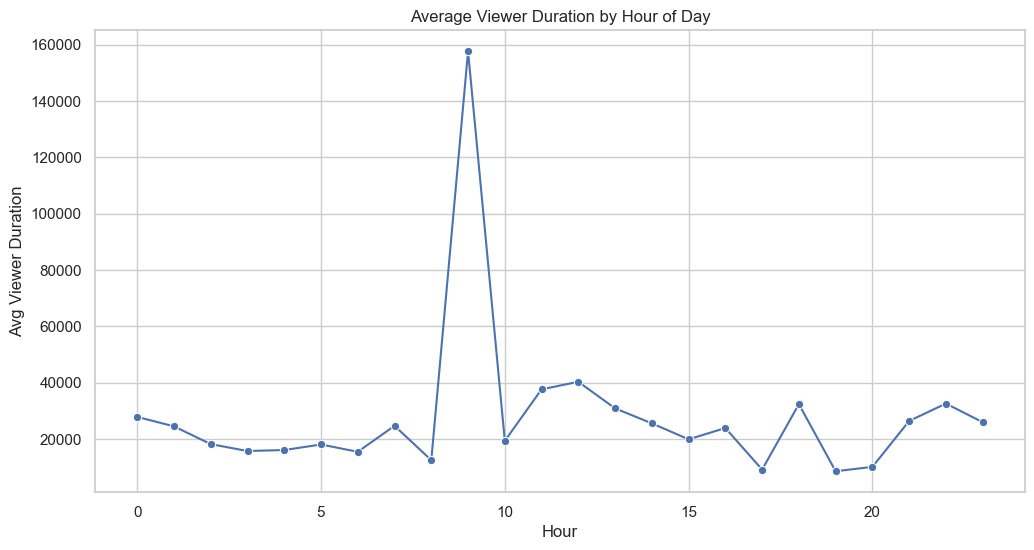

In [6]:
# Step 4: Optimal Ad Placement Time
hourly = df.groupby('hour').agg({
    'totalViewerDuration': 'mean',
    'userID': 'count'
}).rename(columns={'userID': 'streamCount'})

sns.lineplot(data=hourly, x=hourly.index, y='totalViewerDuration', marker='o')
plt.title('Average Viewer Duration by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Avg Viewer Duration')
plt.grid(True)
plt.show()

C:\Users\jeeve\AppData\Local\Temp\ipykernel_17368\775848521.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly.reset_index(), x='hour', y='streamCount', palette='viridis')


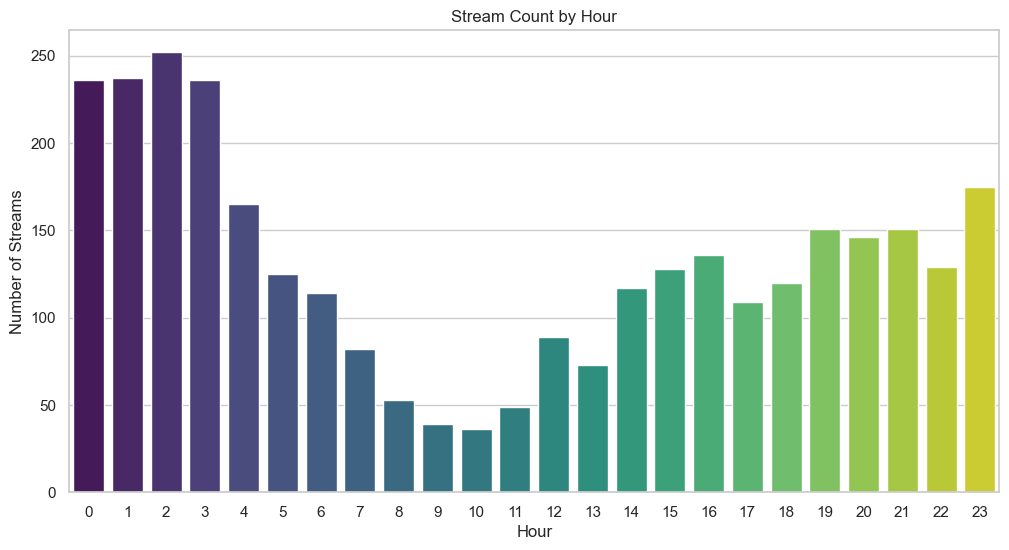

In [8]:
sns.barplot(data=hourly.reset_index(), x='hour', y='streamCount', palette='viridis')
plt.title('Stream Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Streams')
plt.show()


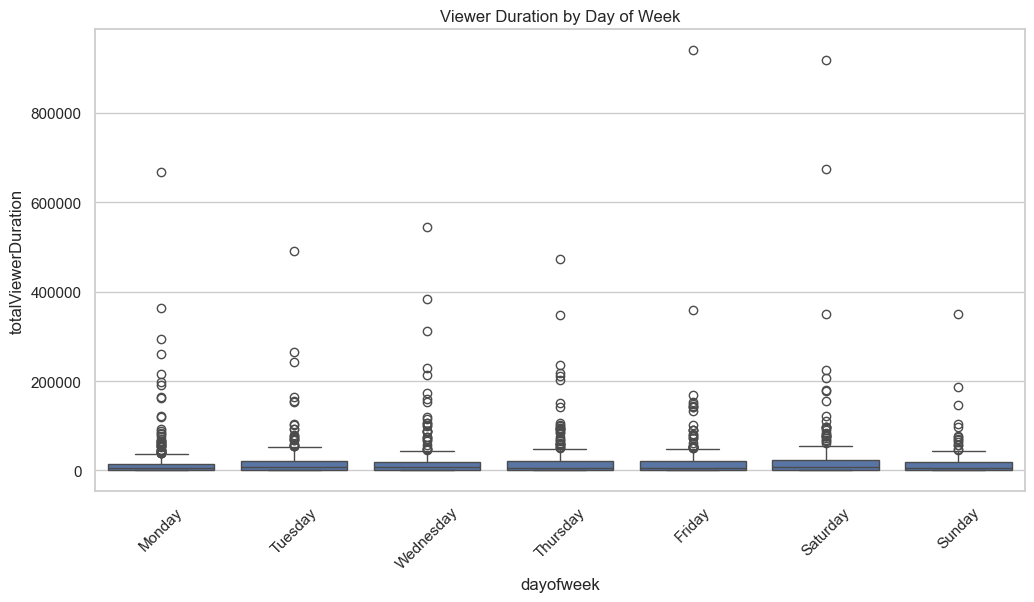

In [9]:
# Day of Week Analysis
sns.boxplot(x='dayofweek', y='totalViewerDuration',
            data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Viewer Duration by Day of Week')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Step 5: Marketing Campaign Evaluation
control_suffix = ['d', 'f', '1', '2', '3', '4', '5', '8']
test_suffix = ['a', 'c', 'b', 'e', '0', '6', '7', '9']

def assign_group(user_id):
    if isinstance(user_id, str) and len(user_id) > 0:
        suffix = user_id[-1]
        return 'Control' if suffix in control_suffix else 'Test'
    return 'Unknown'

df['group'] = df['userID'].apply(assign_group)
df = df[df['group'].isin(['Control', 'Test'])]

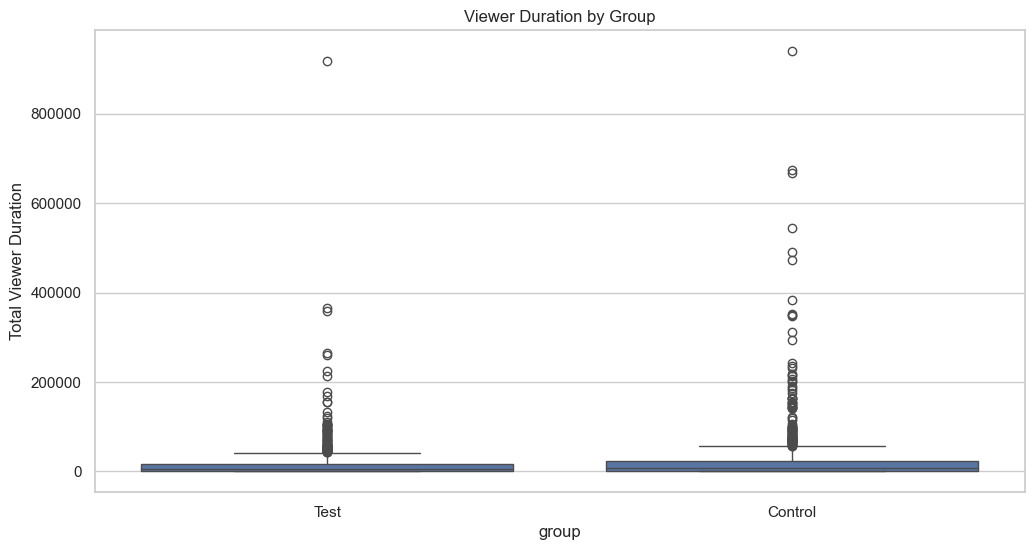

In [11]:
sns.boxplot(x='group', y='totalViewerDuration', data=df)
plt.title('Viewer Duration by Group')
plt.ylabel('Total Viewer Duration')
plt.show()

In [12]:
control_dur = df[df['group'] == 'Control']['totalViewerDuration']
test_dur = df[df['group'] == 'Test']['totalViewerDuration']

stat, p_value = mannwhitneyu(test_dur, control_dur)
print(f"Mann-Whitney U Test: U={stat:.2f}, p-value={p_value:.4f}")

Mann-Whitney U Test: U=nan, p-value=nan


In [13]:
# Final Report Summary
print(f"""
Final Report
=============
1. Optimal Ad Time Slots:
- Use the hours with peak avg. viewer duration and high stream count.

2. Campaign Evaluation:
- p-value = {p_value:.4f}
- {'Significant' if p_value < 0.05 else 'Not significant'} difference observed.
""")


Final Report
1. Optimal Ad Time Slots:
- Use the hours with peak avg. viewer duration and high stream count.

2. Campaign Evaluation:
- p-value = nan
- Not significant difference observed.

